In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

from helpers import load_data
from cross_validation import cross_validation_step_als

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
path_dataset = "../data/data_train.csv"
ratings = load_data(path_dataset)

## Tuning of the ALS model

### Tuning of $\lambda_{item}$

In [ ]:
lambdas = [0.3, 0.35, 1.1, 0.5, 1, 1.4, 0.01, 0.025, 0.425, 1.2, 0.55, 0.8, 0.65, 0.9, 0.4, 0.675, 
           0.6, 0.625, 0.05, 0.475, 1.5, 0.575, 0.15, 0.1, 0.525, 1.3, 0.7, 0.075, 0.45, 0.2]

In [ ]:
tr_e_item = []
te_e_item = []

In [ ]:
for i, lambda_ in enumerate(lambdas):
    print('===========')
    print('Lambda {}/{}'.format(i+1, len(lambdas)))
    
    tr, te = cross_validation_step_als(ratings, k_fold=3, num_features=25, 
                                       lambda_user=0.014, lambda_item=lambda_, verbose=False)
    tr_e_item.append(tr)
    te_e_item.append(te)
    
    print('___________')
    print(tr_e_item[-1], te_e_item[-1])

In [ ]:
"""d_item = {}

for i in range(len(lambdas)):
    d_item[(lambdas[i])] = [tr_e_item[i], te_e_item[i]]
    
with open(b'../data/pickle/cross_validation/test_item_als_cross.pickle' , 'wb') as file:
    pickle.dump(d_item, file)"""

In [2]:
with open('../data/pickle/cross_validation/test_item_als_cross.pickle', 'rb') as file:
    d_item = pickle.load(file)

In [3]:
lambdas = []
tr_e_item = []
te_e_item = []
for l in d_item.keys():
    lambdas.append(l)
    tr_e_item.append(d_item[l][0])
    te_e_item.append(d_item[l][1])

lambdas, te_e_item, tr_e_item = zip(*sorted(zip(lambdas, te_e_item, tr_e_item)))

In [4]:
best_lambda_item = lambdas[np.argmin(te_e_item)]
best_lambda_item

0.575

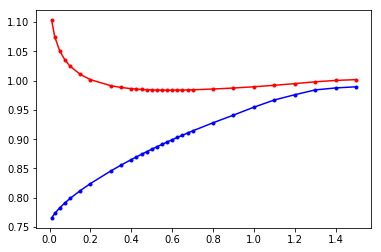

In [5]:
plt.plot(lambdas, tr_e_item, marker=".", color='b', label='Train accuracy')
plt.plot(lambdas, te_e_item, marker=".", color='r', label='Test accuracy')
plt.show()

### Tuning of $\lambda_{user}$

In [ ]:
lambdas = [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.012, 0.013, 0.014, 0.015, 0.016, 0.0175, 0.02, 0.025, 0.03, 0.04, 0.05]

In [ ]:
tr_e_user = []
te_e_user = []

In [ ]:
for i, lambda_ in enumerate(lambdas):
    print('===========')
    print('Lambda {}/{}'.format(i+1, len(lambdas)))
    
    tr, te = cross_validation_step_als(ratings, k_fold=3, num_features=25, 
                                       lambda_user=lambda_, lambda_item=0.575, verbose=False)
    tr_e_item.append(tr)
    te_e_item.append(te)
    
    print('___________')
    print(tr_e_user[-1], te_e_user[-1])

In [ ]:
"""d_user = {}

for i in range(len(lambdas)):
    d_user[(lambdas[i])] = [tr_e_user[i], te_e_user[i]]
    
with open(b'../data/pickle/cross_validation/test_user_als_cross.pickle' , 'wb') as file:
    pickle.dump(d_user, file)"""

In [6]:
with open('../data/pickle/cross_validation/test_user_als_cross.pickle', 'rb') as file:
    d_user = pickle.load(file)

In [7]:
lambdas = []
tr_e_user = []
te_e_user = []
for l in d_user.keys():
    lambdas.append(l)
    tr_e_user.append(d_user[l][0])
    te_e_user.append(d_user[l][1])

lambdas, te_e_user, tr_e_user = zip(*sorted(zip(lambdas, te_e_user, tr_e_user)))

In [8]:
best_lambda_user = lambdas[np.argmin(te_e_user)]
best_lambda_user

0.014

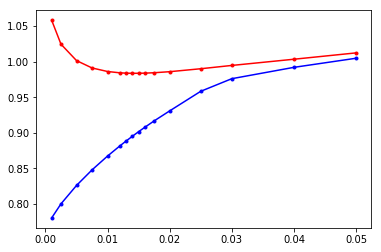

In [9]:
plt.plot(lambdas, tr_e_user, marker=".", color='b', label='Train accuracy')
plt.plot(lambdas, te_e_user, marker=".", color='r', label='Test accuracy')
plt.show()